In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [2]:
!pip install pystan
!pip install prophet
!pip install scikit-learn

  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached aiohttp-3.8.4-cp310-cp310-win_amd64.whl (319 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using ca

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  Traceback (most recent call last):
    File "C:\Users\abbu0\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\abbu0\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\abbu0\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\Users\abbu0\AppData\Local\Temp\pip-build-env-27mz_mcz\overlay\Lib\site-packages\setuptools\build_meta.py", line 341, in get_requires_for_build_wheel
      return self._get_build_requires(config_

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
# reading from multiple csv files
# assign dataset names
list_of_files = ['NIFTY 100_Data','crypto_top4','Gold(USD)']
 
# create empty list
dataframes_list = []
 
# append datasets into the list
for i in range(len(list_of_files)):
    temp_df = pd.read_csv("data/"+list_of_files[i]+".csv")
    dataframes_list.append(temp_df)

In [5]:
# split data
stocks_data = dataframes_list[0]
crypto_data = dataframes_list[1]
gold_data = dataframes_list[2]

In [6]:
# Convert to_datetime, change date to ds and value to train to y
stocks_data['ds'] = pd.to_datetime(stocks_data['Date'])
crypto_data['ds'] = pd.to_datetime(crypto_data['Date'])
gold_data['ds'] = pd.to_datetime(gold_data['Date'])

stocks_data['y'] = stocks_data['Close']
crypto_data['y'] = crypto_data['Close']
gold_data['y'] = gold_data['Close']

# drop other columns
stocks_data = stocks_data[['y', 'ds']]
crypto_data = crypto_data[['y', 'ds']]
gold_data = gold_data[['y', 'ds']]

In [7]:
# # function to split the data into train and test, with test_ratio as 0.2 meaning train:test = 80:20
# def split_train_test(data, test_ratio=0.2):
#     split_index = int(len(df) * (1 - test_ratio))
#     train_set = data[:split_index]
#     test_set = data[split_index:]
#     return train_set, test_set

In [8]:
# function to exclude specific time period
def split_train_test(data, start_date, end_date):
    
    train_set = data[(data['ds'] < start_date) | (data['ds'] > end_date)]
    test_set = data[(data['ds'] >= start_date) & (data['ds'] <= end_date)]
    
    return train_set, test_set

In [9]:
# function to train the models accordingly
def train_model(train_df):
    model = Prophet()
    model.fit(train_df)
    return model

In [10]:
# # function to predict and validate the data with test set
# def validate_predictions(model, test_df):
#     future = model.make_future_dataframe(periods=len(test_df),freq='D')
#     forecast = model.predict(future)
#     return forecast

In [11]:
# function to predict and validate the data between time periods
def validate_predictions(model, start_date, end_date):
    
    # Generate future dates between the specified range
    future = pd.date_range(start=start_date, end=end_date, freq='D')
    future_df = pd.DataFrame({'ds': future})

    # Make predictions for the future dates
    forecast = model.predict(future_df)
    
    return forecast

In [12]:
# function to predict based on the time period input by the user
def time_period_predictions(model, time_period):
    future = m.make_future_dataframe(periods=time_period,freq='D')
    forecast = m.predict(future)
    return forecast

In [13]:
# # split data into train and test sets
# stocks_train, stocks_test = split_train_test(stocks_data)
# crypto_train, crypto_test = split_train_test(crypto_data)
# gold_train, gold_test = split_train_test(gold_data)

In [14]:
start_date = '2019-12-01'
end_date = '2021-12-01'

In [15]:
# exclude data into train and test sets by time period
stocks_train, stocks_test = split_train_test(stocks_data,start_date,end_date)
crypto_train, crypto_test = split_train_test(crypto_data,start_date,end_date)
gold_train, gold_test = split_train_test(gold_data,start_date,end_date)

In [16]:
# Train models for each data type
stocks_model = train_model(stocks_train)
crypto_model = train_model(crypto_train)
gold_model = train_model(gold_train)

21:58:52 - cmdstanpy - INFO - Chain [1] start processing
21:58:57 - cmdstanpy - INFO - Chain [1] done processing
21:58:57 - cmdstanpy - INFO - Chain [1] start processing
21:58:57 - cmdstanpy - INFO - Chain [1] done processing
21:58:57 - cmdstanpy - INFO - Chain [1] start processing
21:58:58 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# # validating predictions with the test
# stocks_validation = validate_predictions(stocks_model, stocks_test)
# crypto_validation = validate_predictions(crypto_model, crypto_test)
# gold_validation = validate_predictions(gold_model, gold_test)

In [18]:
# validating predictions with the test for excluded dates
stocks_validation = validate_predictions(stocks_model,start_date,end_date)
crypto_validation = validate_predictions(crypto_model,start_date,end_date)
gold_validation = validate_predictions(gold_model,start_date,end_date)

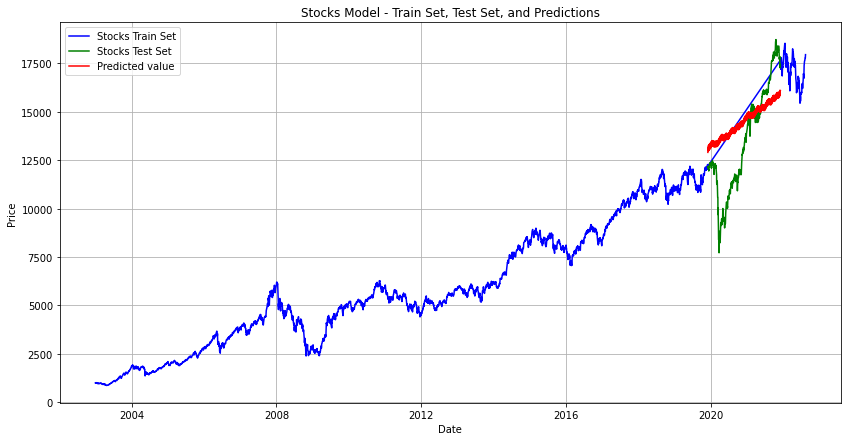

In [19]:
plt.figure(figsize=(14, 7))

plt.plot(stocks_train['ds'], stocks_train['y'], label='Stocks Train Set', color='blue')
plt.plot(stocks_test['ds'], stocks_test['y'], label='Stocks Test Set', color='green')
plt.plot(stocks_validation['ds'], stocks_validation['yhat'], label='Predicted value', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stocks Model - Train Set, Test Set, and Predictions')
plt.legend()
plt.grid(True)
plt.show()

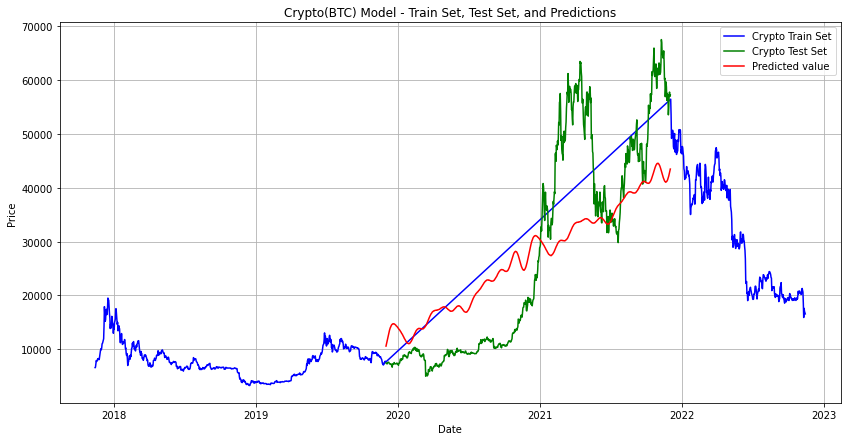

In [20]:
plt.figure(figsize=(14, 7))

plt.plot(crypto_train['ds'], crypto_train['y'], label='Crypto Train Set', color='blue')
plt.plot(crypto_test['ds'], crypto_test['y'], label='Crypto Test Set', color='green')
plt.plot(crypto_validation['ds'], crypto_validation['yhat'], label='Predicted value', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Crypto(BTC) Model - Train Set, Test Set, and Predictions')
plt.legend()
plt.grid(True)
plt.show()

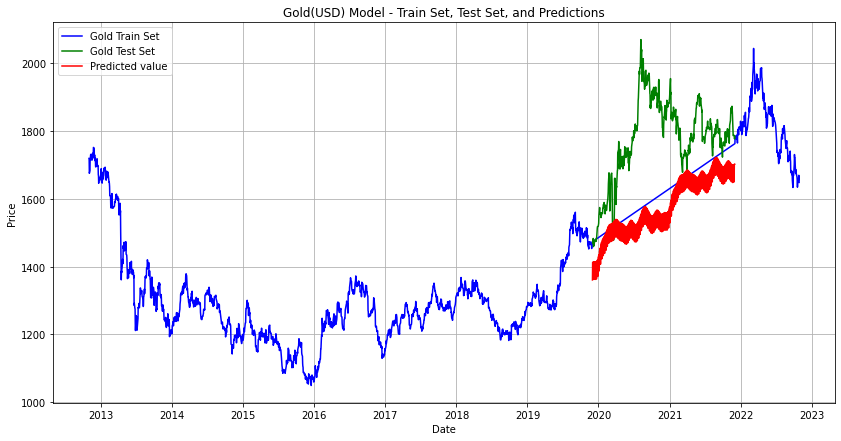

In [21]:
plt.figure(figsize=(14, 7))

plt.plot(gold_train['ds'], gold_train['y'], label='Gold Train Set', color='blue')
plt.plot(gold_test['ds'], gold_test['y'], label='Gold Test Set', color='green')
plt.plot(gold_validation['ds'], gold_validation['yhat'], label='Predicted value', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold(USD) Model - Train Set, Test Set, and Predictions')
plt.legend()
plt.grid(True)
plt.show()